In [55]:
import pandas as pd 
import numpy as np
import wordcloud 
import string 
import nltk
import re

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
news = pd.read_csv('../../data/00-raw-data/news_raw.csv')
news = news[news['content'] != '[Removed]']
news.head()

,id,name,author,title,description,url,publishedAt,content,topic
0,bbc-news,BBC News,https://www.facebook.com/bbcnews,Wiltshire Long Covid patient says they have 'n...,"Ursula Wick, who was hospitalised in 2021, is ...",https://www.bbc.co.uk/news/uk-england-wiltshir...,2023-11-11T13:52:07Z,A woman suffering from long Covid said she has...,1
1,abc-news-au,ABC News (AU),Brooke Chandler,Long COVID research offers 'light at the end o...,Giuliano Gaspri spent eight months in hospital...,https://www.abc.net.au/news/2023-12-02/long-co...,2023-12-01T19:15:00Z,"Before Giuliano Gaspri caught COVID-19, he was...",1
2,time,Time,Jamie Ducharme,Getting Vaccinated May Be Your Best Protection...,People who got at least one COVID-19 vaccine b...,https://time.com/6338434/vaccination-long-covi...,2023-11-22T23:30:00Z,People vaccinated before their first case of C...,1
3,new-scientist,New Scientist,NaN,Governments must stay in it for the long haul ...,Lingering symptoms after a covid-19 infection ...,https://www.newscientist.com/article/mg2603467...,2023-11-29T18:10:00Z,Bryan Olin Dozier/NurPhoto/Shutterstock\r\nIT ...,1
4,cbc-news,CBC News,NaN,'What I want are recovery narratives': CBC Rad...,"""It can be a challenge to stay present, to not...",https://www.cbc.ca/news/canada/toronto/gill-de...,2023-12-02T10:00:00Z,Gill Deacon is the host of CBC Radio's Here &a...,1


In [57]:
news['all_text'] = news['title'] + ' ' + news['description'] + ' ' + news['content']
news.head()

,id,name,author,title,description,url,publishedAt,content,topic,all_text
0,bbc-news,BBC News,https://www.facebook.com/bbcnews,Wiltshire Long Covid patient says they have 'n...,"Ursula Wick, who was hospitalised in 2021, is ...",https://www.bbc.co.uk/news/uk-england-wiltshir...,2023-11-11T13:52:07Z,A woman suffering from long Covid said she has...,1,Wiltshire Long Covid patient says they have 'n...
1,abc-news-au,ABC News (AU),Brooke Chandler,Long COVID research offers 'light at the end o...,Giuliano Gaspri spent eight months in hospital...,https://www.abc.net.au/news/2023-12-02/long-co...,2023-12-01T19:15:00Z,"Before Giuliano Gaspri caught COVID-19, he was...",1,Long COVID research offers 'light at the end o...
2,time,Time,Jamie Ducharme,Getting Vaccinated May Be Your Best Protection...,People who got at least one COVID-19 vaccine b...,https://time.com/6338434/vaccination-long-covi...,2023-11-22T23:30:00Z,People vaccinated before their first case of C...,1,Getting Vaccinated May Be Your Best Protection...
3,new-scientist,New Scientist,NaN,Governments must stay in it for the long haul ...,Lingering symptoms after a covid-19 infection ...,https://www.newscientist.com/article/mg2603467...,2023-11-29T18:10:00Z,Bryan Olin Dozier/NurPhoto/Shutterstock\r\nIT ...,1,Governments must stay in it for the long haul ...
4,cbc-news,CBC News,NaN,'What I want are recovery narratives': CBC Rad...,"""It can be a challenge to stay present, to not...",https://www.cbc.ca/news/canada/toronto/gill-de...,2023-12-02T10:00:00Z,Gill Deacon is the host of CBC Radio's Here &a...,1,'What I want are recovery narratives': CBC Rad...


In [48]:
def clean_text(text):
    # Add your text cleaning logic here
    cleaned_text = text.lower()  # Example: Convert to lowercase
    cleaned_text = cleaned_text.strip()  # Remove leading and trailing spaces
    cleaned_text = re.sub(r'\[.*?\]', '', cleaned_text) 
    cleaned_text = ' '.join(cleaned_text.split()[:-1])
    cleaned_text = re.sub(r'[^a-zA-Z0-9 ]', '', cleaned_text)  # Remove special characters
    cleaned_text = re.sub(r'\.\.\.+', '', cleaned_text)
    cleaned_text = cleaned_text.replace('...', '')  # Remove ellipses
    cleaned_text = cleaned_text.replace('doziernurphotoshutterstock', '')  # Remove specifc word
    cleaned_text = cleaned_text.replace('/', ' ')  # Remove '/'
    cleaned_text = ' '.join([word for word in cleaned_text.split() if len(word) > 1 or word.lower() in {'i', 'a'}])

    
    return cleaned_text

In [58]:
news['all_text'] = news['all_text'].apply(clean_text)

In [59]:
pd.set_option('display.max_colwidth', None)
news['all_text']


0                                                                                                                                                                        wiltshire long covid patient says they have no support ursula wick who was hospitalised in 2021 is still living with the effects of the virus a woman suffering from long covid said she has been left with no support ursula wick from swindon struggles with tiredness aches pains and a loss of strength after contracting the virus and
1                                              long covid research offers light at the end of the tunnel finding symptoms ease over time giuliano gaspri spent eight months in hospital with covid hes part of a study of long covid patients which hasnt found the cause but did find life can return to normal with time before giuliano gaspri caught covid19 he was climbing up transmitter towers overlooking the new south wales illawarra region as part of his fulltime maintenance job key points ullistud

In [60]:

pd.reset_option('display.max_colwidth')

In [61]:
text = news['all_text'].tolist()
text = ' '.join([str(elem) for elem in text])

In [62]:

# #FILTER OUT UNWANTED CHARACTERS
new_text=""
for character in text:
    if character in string.printable:
        new_text+=character
text=new_text

# #FILTER OUT UNWANTED WORDS
new_text=""
for word in nltk.tokenize.word_tokenize(text):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1]+word+" "
        else: #add a space
            new_text+=word.lower()+" "
text=new_text

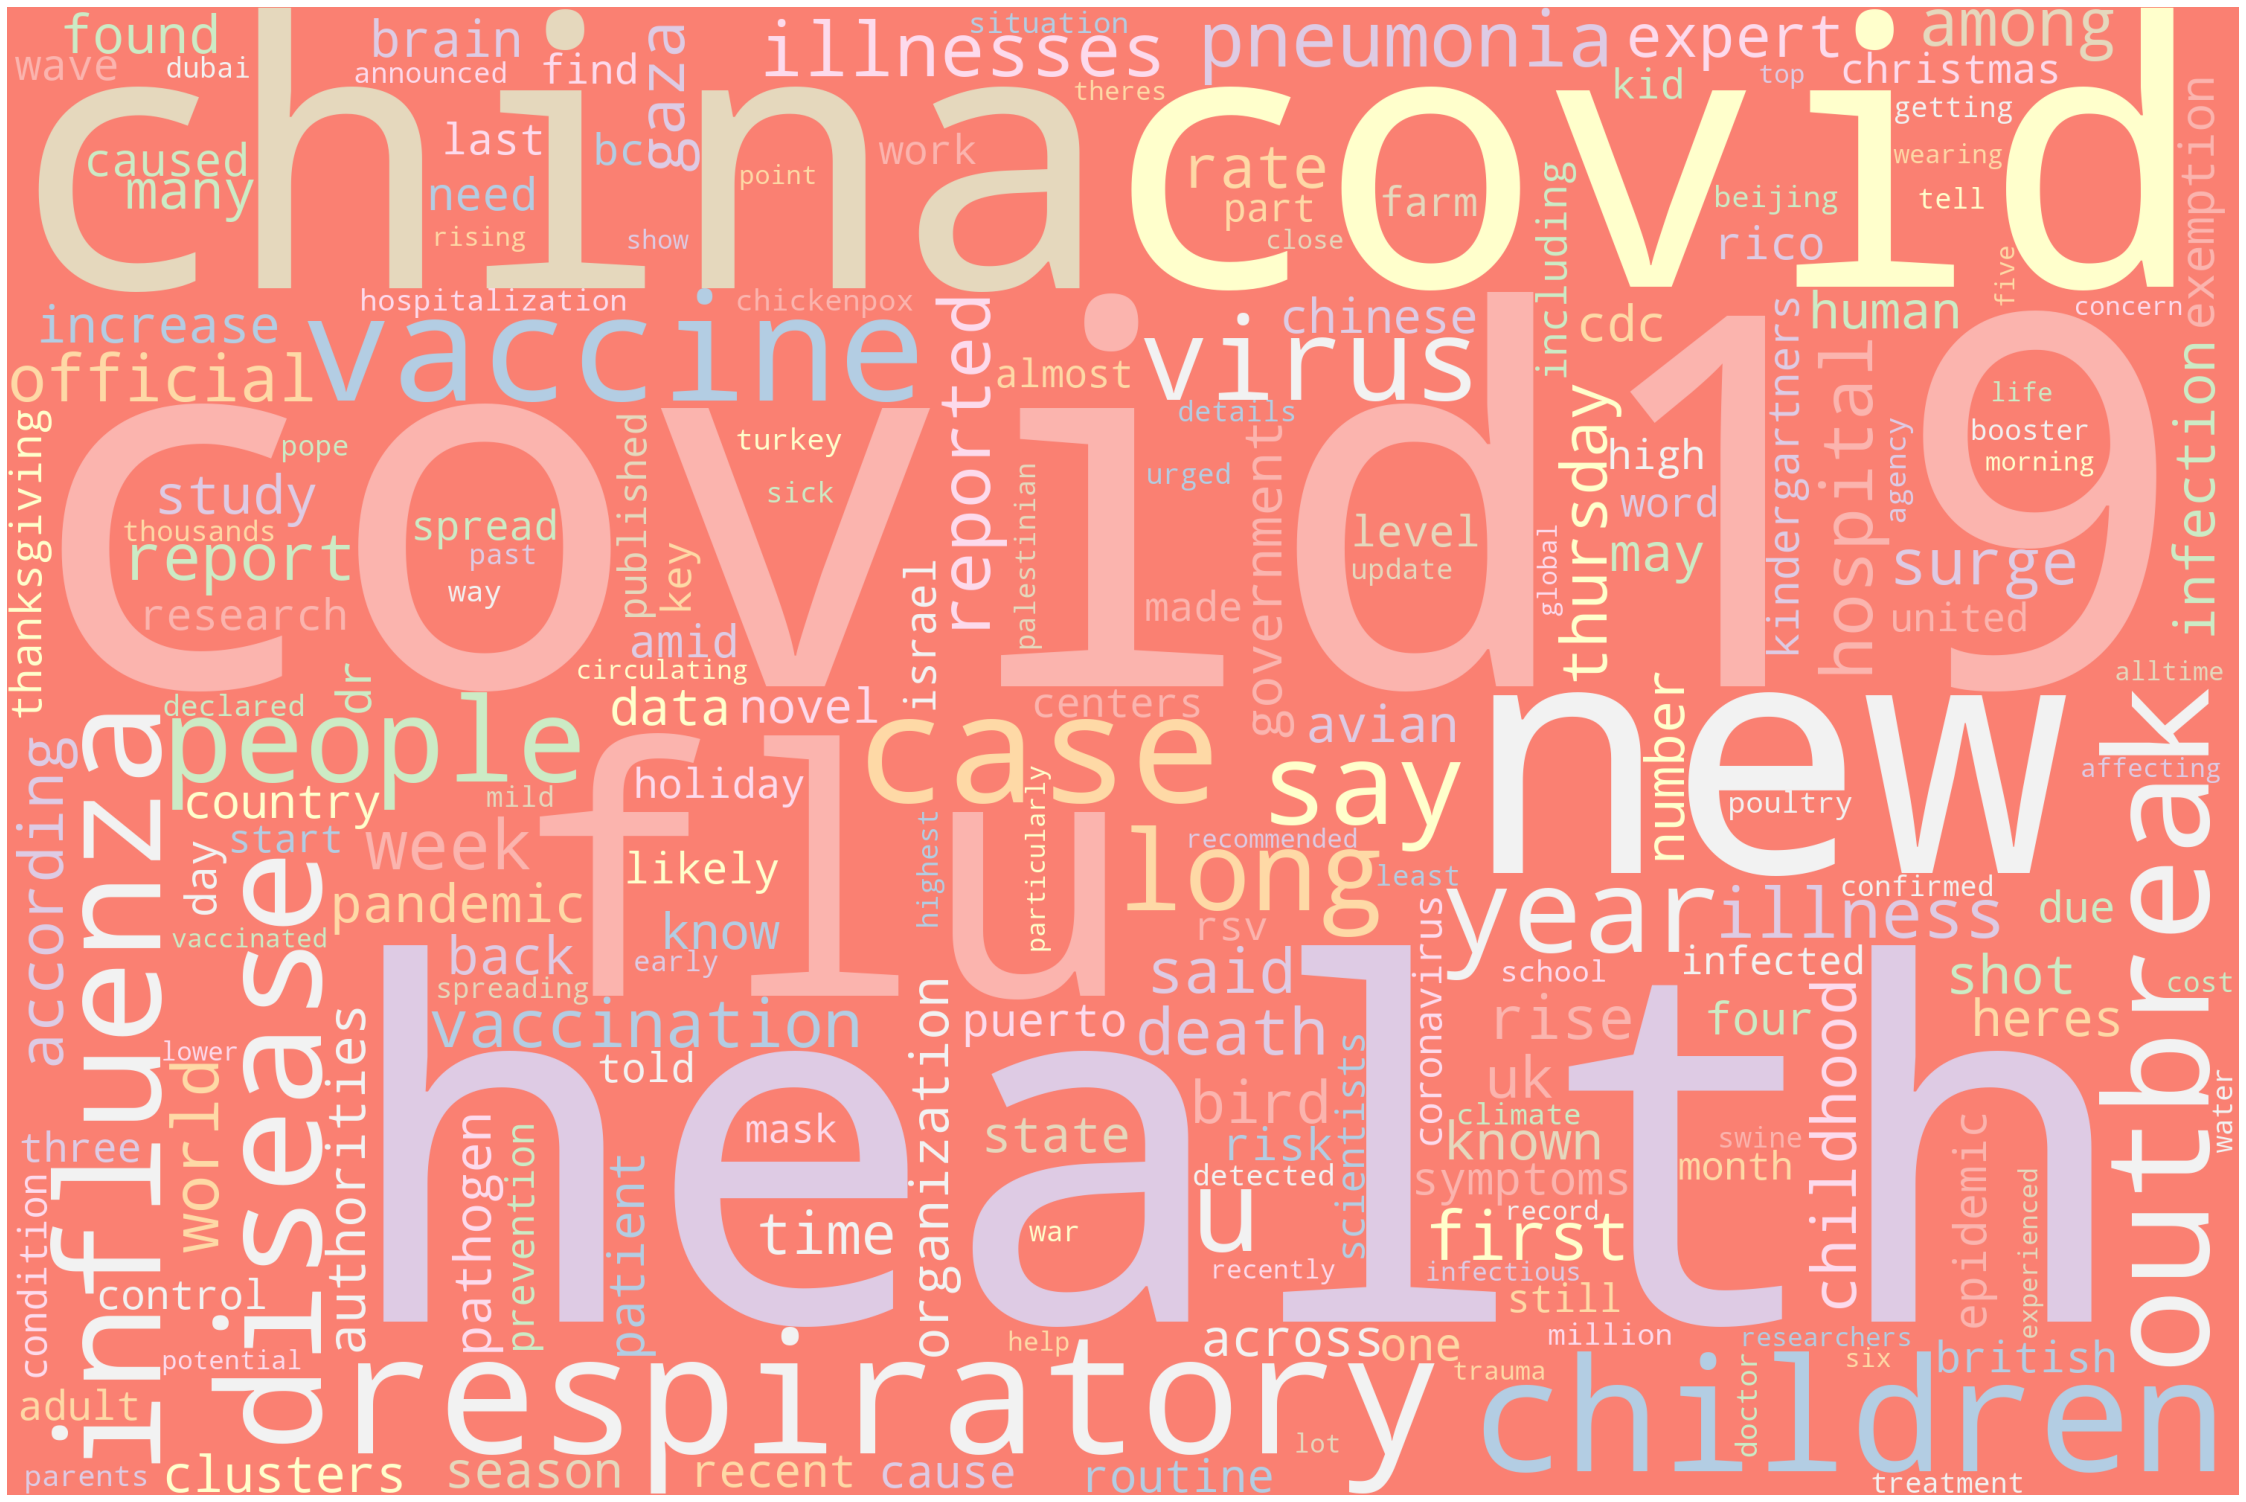

In [63]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

generate_word_cloud(text)

In [64]:
my_file = open('../../data/00-raw-data/white_house_statement_raw.txt', "r") 
  
# reading the file 
data = my_file.read() 

In [65]:
data

'Memorandum on Addressing the Long-Term Effects of COVID-\u206019\nApril 05, 2022\nMEMORANDUM FOR THE HEADS OF EXECUTIVE DEPARTMENTS AND AGENCIES\n\nSUBJECT:      Addressing the Long-Term Effects of COVID-19 \n\nBy the authority vested in me as President by the Constitution and the laws of the United States of America, it is hereby ordered as follows:\n\nSection 1.  Policy.  My Administration has made combating the coronavirus disease 2019 (COVID-19) pandemic, and guiding the Nation through the worst public health crisis in more than a century, our top priority.  When I came into office, COVID-19 was wreaking havoc on our country — closing our businesses, keeping our kids out of school, and forcing us into isolation.  Today, America has the tools to protect against COVID-19 and to dramatically decrease its risks.  We move towards a future in which COVID-19 does not disrupt our daily lives and is something we prevent, protect against, and treat.\n\nAs we chart the path forward, we remem

In [68]:
paragraphs = data.split('\n\n')

# Iterate through paragraphs, identify and remove lines starting with numbers
cleaned_paragraphs = [re.sub(r'^\d+\.\s*', '', paragraph.strip()) for paragraph in paragraphs]

# Create a DataFrame with cleaned text and numbered index starting at 1
df = pd.DataFrame({'Text': cleaned_paragraphs}, index=range(1, len(cleaned_paragraphs)+1))

def clean_text(text):
    # Add your text cleaning logic here
    cleaned_text = text.lower()  # Example: Convert to lowercase
    cleaned_text = cleaned_text.strip()  # Remove leading and trailing spaces
    cleaned_text = re.sub(r'\(.*?\)', '', cleaned_text) 
    cleaned_text = re.sub(r'[^a-zA-Z0-9 ]', '', cleaned_text)  # Remove special characters
    cleaned_text = re.sub(r'\.\.\.+', '', cleaned_text)
    cleaned_text = cleaned_text.replace('subject:', '')  # Remove ellipses
    cleaned_text = cleaned_text.replace('sec.', '')  # Remove specifc word
    cleaned_text = cleaned_text.replace('/', ' ')  # Remove '/'
    cleaned_text = ' '.join([word for word in cleaned_text.split() if len(word) > 1 or word.lower() in {'i', 'a'}])
    cleaned_text = cleaned_text.strip() 
    
    return cleaned_text

df['Text'] = df['Text'].apply(clean_text)

# Print the DataFrame
print(df)

                                                 Text
1   memorandum on addressing the longterm effects ...
2   subject addressing the longterm effects of cov...
3   by the authority vested in me as president by ...
4   section policy my administration has made comb...
5   as we chart the path forward we remember the m...
6   at the same time many of our family members ne...
7   in addition the american public is grappling w...
8   our nation can continue to protect the public ...
9   sec organizing the governmentwide response to ...
10  the heads of agencies shall assist and provide...
11  in performing the duties described in subsecti...
12  sec report on the longterm effects of covid19 ...
13  sec national research action plan on long covi...
14  the national research action plan shall build ...
15  help measure and characterize long covid in bo...
16  support the development of estimates on preval...
17  better understand the epidemiology course of i...
18  advance our understandin

In [69]:
text = df['Text'].tolist()
text = ' '.join([str(elem) for elem in text])

In [70]:

# #FILTER OUT UNWANTED CHARACTERS
new_text=""
for character in text:
    if character in string.printable:
        new_text+=character
text=new_text

# #FILTER OUT UNWANTED WORDS
new_text=""
for word in nltk.tokenize.word_tokenize(text):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1]+word+" "
        else: #add a space
            new_text+=word.lower()+" "
text=new_text

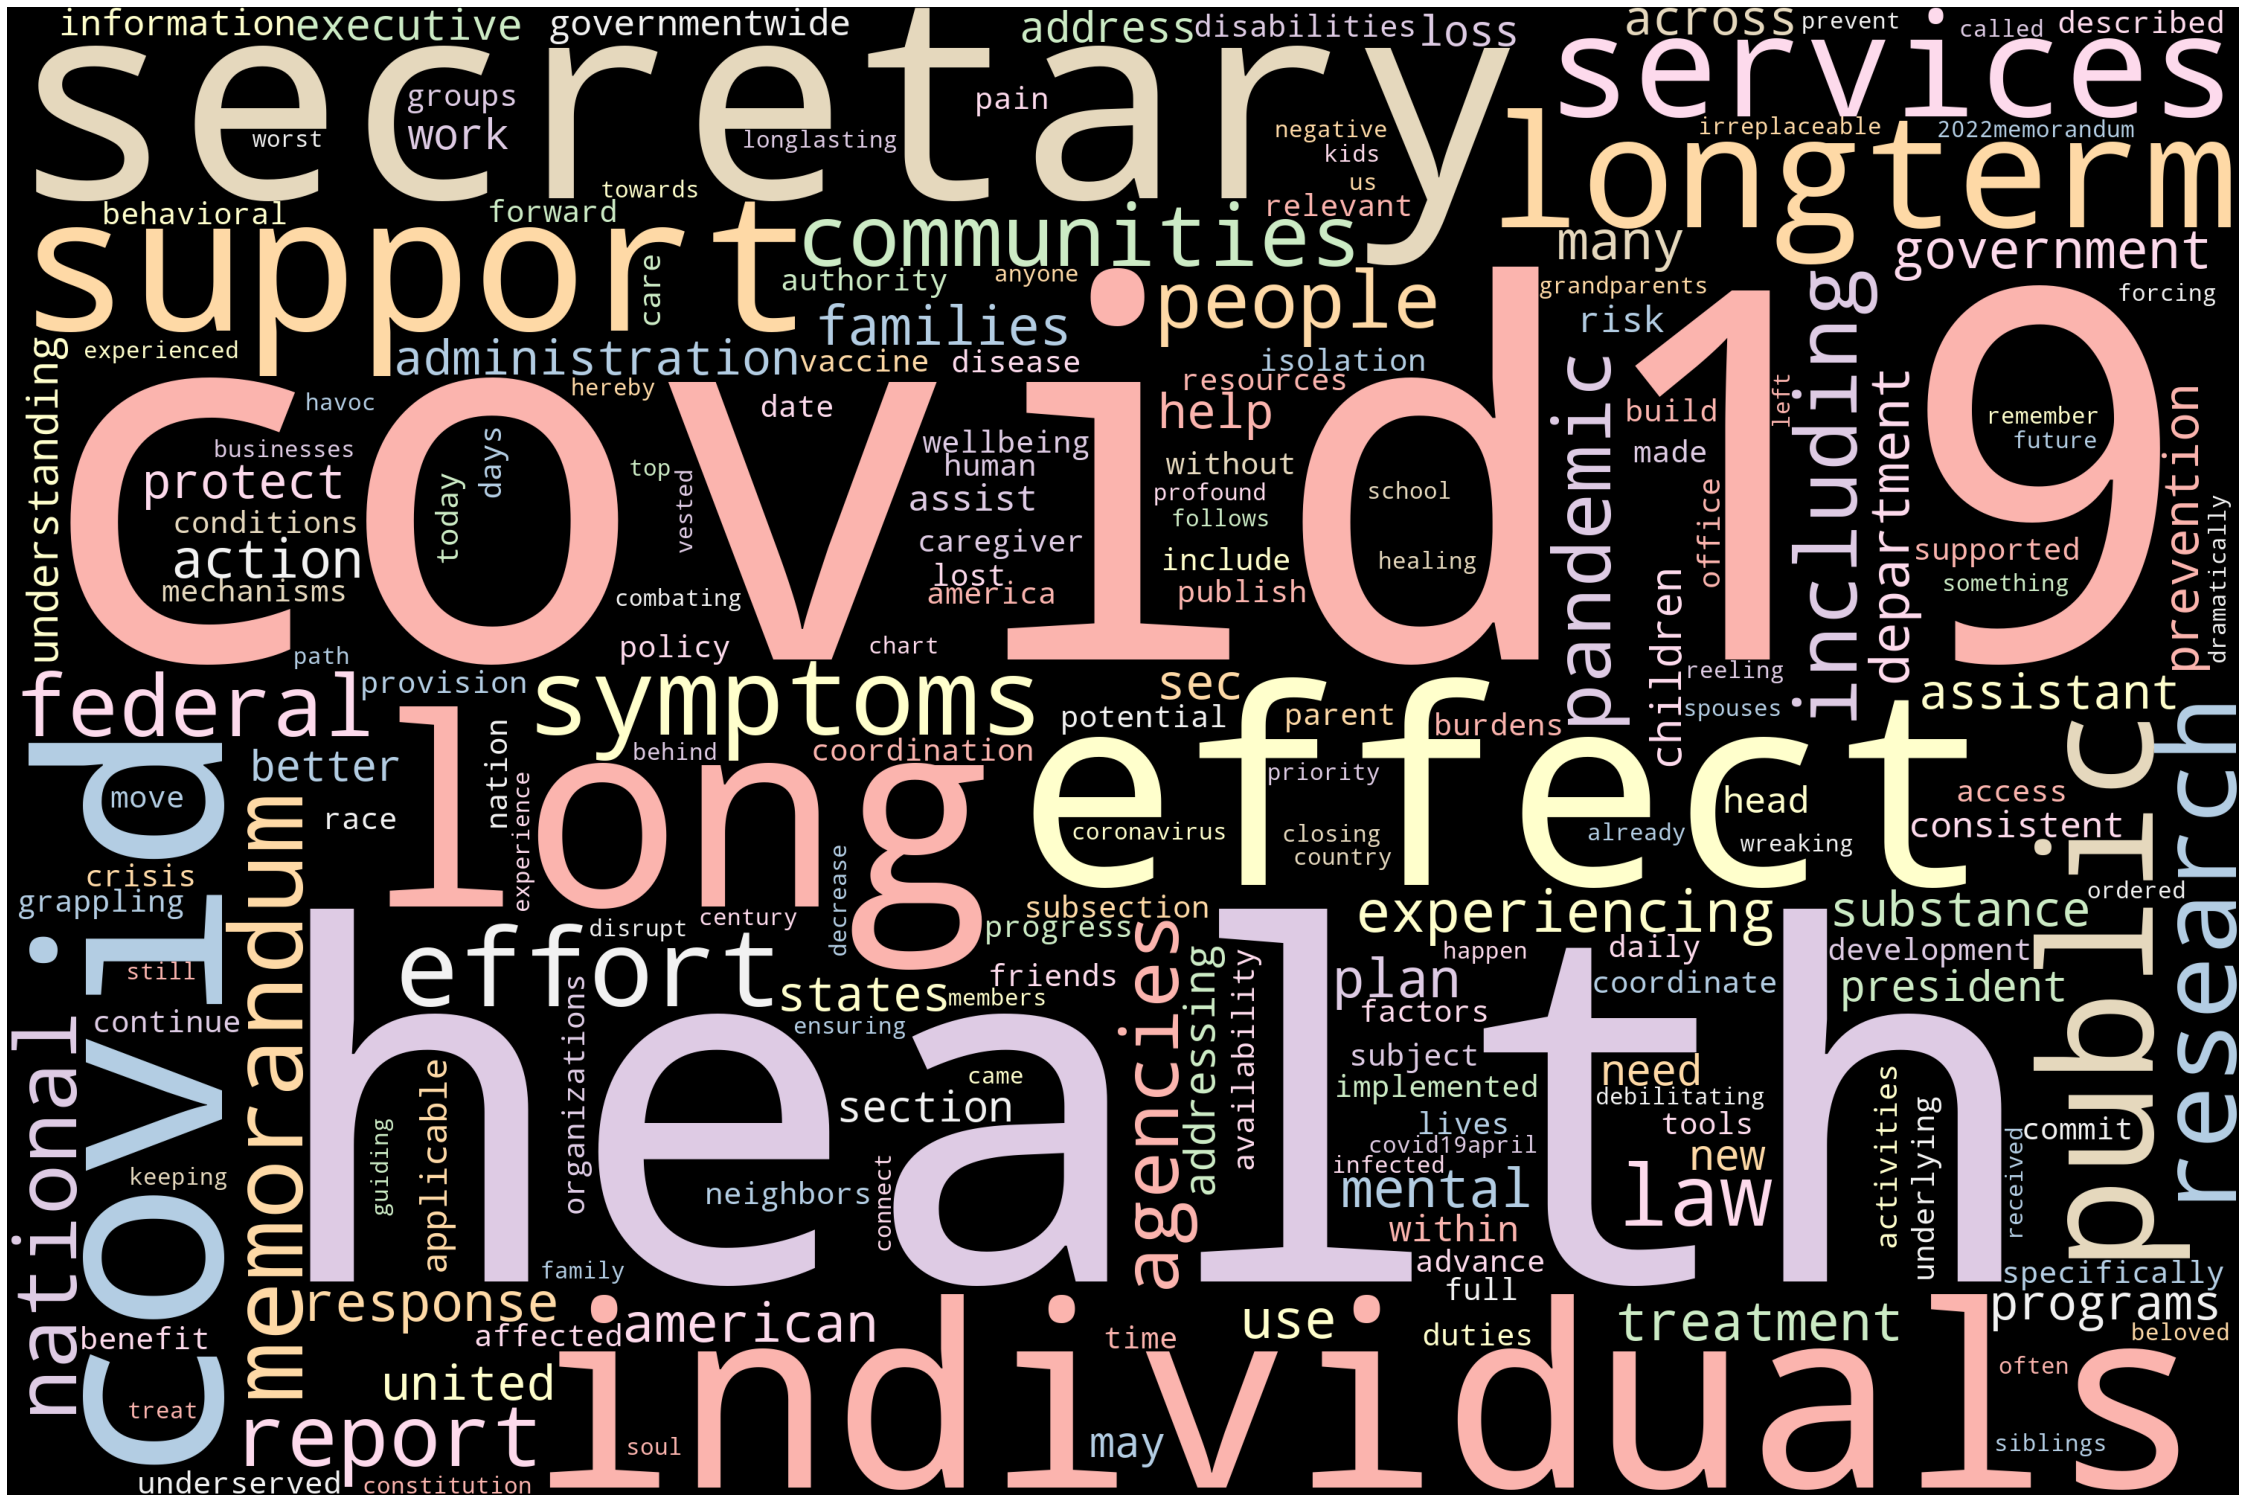

In [72]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='black', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

generate_word_cloud(text)